In [1]:
using Revise

┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1184


In [8]:
using PyPlot, JuLIP, JuLIPMaterials

FCC = JuLIPMaterials.FCC

species = :Al
calc = lennardjones(r0=rnn(species))

function plot_layers(at; ms = 10, xcore = nothing)
    x, y, z = xyz(at) 
    I0 = findall(z .== 0)
    I1 = findall(z .> 0)
    plot(x[I0], y[I0], "b.", markersize=ms)
    plot(x[I1], y[I1], "g.", markersize=ms)
    if xcore != nothing
        plot([xcore[1]], [xcore[2]], "r.", markersize=1.5*ms)
    end 
    PyPlot.axis("equal")
end 

plot_layers (generic function with 1 method)

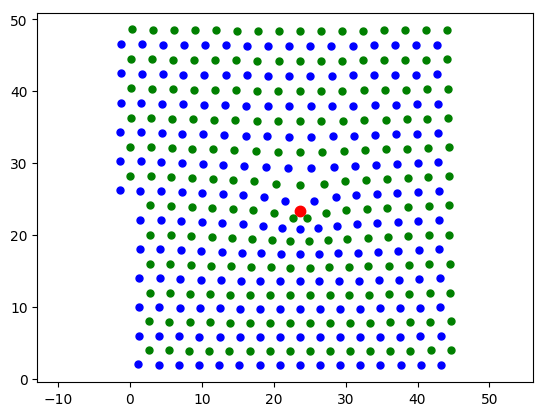

In [9]:
# [TEST1] Visualise the solution
# ------------------------------------------------------------------------------------
#   * change cle=:anisotropic to cle=:isotropic to experiment with the two solutions
#   * try truncate = true to get a circular cluster
# ------------------------------------------------------------------------------------

at, xcore = FCC.fcc_edge_geom(species, 6.1, truncate=false, cle=:anisotropic, calc = calc)
plot_layers(at, xcore=xcore);

In [11]:
# [TEST2] Decay of residual forces
# ------------------------------------------------------------
#  We compute the predictors for 
#    * isotropic
#    * anisotropic
#    * anisotropic + EOS correction 
#  then plot the decay of residual forces for each case 
# ------------------------------------------------------------

R = 150.0

r = Vector{Float64}[] 
f = Vector{Float64}[] 

for (cle, corr) in [(:isotropic, false), (:anisotropic, false), (:anisotropic, true) ]
    at, xc = FCC.fcc_edge_geom(species, R, truncate=true, cle=cle, calc = calc, eos_correction = corr)
    set_calculator!(at, calc)
    X = positions(at)
    push!(r, [norm(x[1:2] - xc) for x in X]) 
    F = forces(at) 
    push!(f, norm.(F))
end 

# plot the data points 
loglog(r[1], f[1], "g.", label="isotropic", markersize=1)
loglog(r[2], f[2], "b.", label="anisotropic", markersize=1)
loglog(r[3], f[3], "r.", label="aniso+corr", markersize=1)

s = [extrema(r[1])...]
loglog(s, 40*s.^(-1), "k:", lw=3.0, label=L"r^{-1}")
loglog(s, 40*s.^(-2), "k--", lw=3.0, label=L"r^{-2}")
loglog(s, 400*s.^(-3), "k-", lw=3.0, label=L"r^{-3}")

axis([0.5, s[2]*1.01, 1e-5, 1e2])
legend(loc="lower left")


UndefVarError: UndefVarError: norm not defined